# HR - Attrition Analytics

Human Resources are critical resources of any organiazation. Organizations spend huge amount of time and money to hire and nuture their employees. It is a huge loss for companies if employees leave, especially the key resources. So if HR can predict weather employees are at risk for leaving the company, it will allow them to identify the attrition risks and help understand and provie necessary support to retain those employees or do preventive hiring to minimize the impact to the orgranization.

This dataset is taken from kaggle https://www.kaggle.com/ludobenistant/hr-analytics

Fields in the dataset include:

- Employee satisfaction level
- Last evaluation
- Number of projects
- Average monthly hours
- Time spent at the company
- Whether they have had a work accident
- Whether they have had a promotion in the last 5 years
- Department
- Salary
- Whether the employee has left


### Loading Datasets and exploring metadata

In [1]:
import pandas as pd
import numpy as np

In [2]:
hr_df = pd.read_csv('HR_comma_sep.csv')

In [3]:
hr_df.sample(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,dept,salary
6992,0.63,0.94,4,145,3,0,0,0,technical,medium
719,0.80,1.00,5,260,5,0,1,0,hr,low
10176,0.62,0.51,5,134,3,0,0,0,sales,high
4234,0.89,0.50,4,147,2,0,0,0,technical,medium
9606,0.87,0.63,3,143,3,1,0,0,IT,low
12287,0.11,0.79,6,292,4,0,1,1,technical,low
5730,0.90,0.62,3,233,5,1,0,0,technical,low
2459,0.61,0.48,3,250,2,0,0,0,sales,low
897,0.30,0.56,3,309,4,1,1,0,technical,low
433,0.87,0.84,4,264,6,0,1,0,support,low


In [4]:
hr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   dept                   14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### EDA

- How satisfcation level influences employee's decision to leave?

In [5]:
import matplotlib.pyplot as plt
import seaborn as sn

In [6]:
sl_left = hr_df[hr_df.left == 1]['satisfaction_level']
sl_not_left = hr_df[hr_df.left == 0]['satisfaction_level']

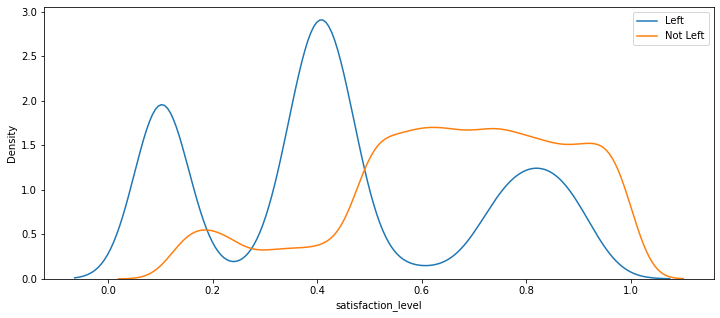

In [7]:
plt.figure(figsize=(12, 5))
sn.kdeplot(sl_left, label='Left')
sn.kdeplot(sl_not_left, label = 'Not Left');
plt.legend();

### Participant Exercise: 1

- How last evaluation influences employee's decision to leave?
- How time_spend_company influences employee's decision to leave?
    - Hint: Use Count Plot (Refer to: https://seaborn.pydata.org/generated/seaborn.countplot.html)

In [ ]:
plt.figure(figsize=(12, 5))
sn.countplot(data = hr_df,
             x = 'time_spend_company',
             hue = 'left');

### Encoding Categorical Features

#### Exploring Categorical Features

In [8]:
hr_df.dept.unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [9]:
hr_df.salary.unique()

array(['low', 'medium', 'high'], dtype=object)

- OHE - One Hot Encoding 
- Dummy Variable Creation

In [10]:
salary_dict = { 'low' : 1,
                'medium': 2,
                'high': 4}

In [11]:
hr_df['salary'] = hr_df.salary.map(salary_dict)

In [12]:
hr_df.sample(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,dept,salary
3945,0.97,0.53,4,247,3,0,0,0,support,1
14247,0.38,0.46,2,137,3,0,1,0,technical,1
9397,0.49,0.83,3,172,2,0,0,0,sales,2
7339,0.51,0.59,4,187,3,0,0,0,sales,1
12372,0.39,0.48,2,141,3,0,1,0,product_mng,2
7231,0.98,0.97,3,209,3,0,0,0,support,1
2113,0.98,0.55,4,255,2,0,0,0,support,1
11872,0.97,0.94,4,253,3,0,0,0,support,2
9007,0.64,0.67,5,167,2,0,0,0,sales,1
4279,0.76,0.62,4,197,3,0,0,0,technical,1


In [13]:
hr_encoded_df = pd.get_dummies( hr_df,
                                columns = ['dept'] )

In [14]:
hr_encoded_df.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,dept_IT,dept_RandD,dept_accounting,dept_hr,dept_management,dept_marketing,dept_product_mng,dept_sales,dept_support,dept_technical
0,0.38,0.53,2,157,3,0,1,0,1,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,2,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,2,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,1,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,1,0,0,0,0,0,0,0,1,0,0


In [16]:
hr_encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   salary                 14999 non-null  int64  
 9   dept_IT                14999 non-null  uint8  
 10  dept_RandD             14999 non-null  uint8  
 11  dept_accounting        14999 non-null  uint8  
 12  dept_hr                14999 non-null  uint8  
 13  dept_management        14999 non-null  uint8  
 14  dept_marketing         14999 non-null  uint8  
 15  de

### Setting X and Y Variables

In [ ]:
hr_encoded_df.columns

In [ ]:
X_features = list(hr_encoded_df.columns)

In [ ]:
X_features

In [ ]:
X_features.remove('left')

In [ ]:
X_features

### Building a model using only one variable
#### Setting X & y variable

In [17]:
X = hr_encoded_df[['satisfaction_level']]
y = hr_encoded_df.left

In [18]:
X[0:2]

,satisfaction_level
0,0.38
1,0.80


In [19]:
y[0:2]

0    1
1    1
Name: left, dtype: int64

### Split Dataset into train and test

- Train: 80%
- Test: 20%

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, \
y_train, y_test = train_test_split( X,
                                    y,
                                    test_size = 0.2,
                                    random_state = 100 )

In [22]:
X_train.shape

(11999, 1)

In [23]:
X_test.shape

(3000, 1)

### Build a Model: V1

Logistic Regression Model - Sigmoid function

<img src="Logistic.png" alt="ML Algorithms" width="600"/>

<img src="Logistic2.png" alt="Logistic Regression" width="800"/>

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
logreg_v1 = LogisticRegression(random_state = 100, 
                               max_iter = 1000)

In [26]:
logreg_v1.fit( X_train, y_train )

LogisticRegression(max_iter=1000, random_state=100)

### Finding Parameters

In [27]:
logreg_v1.intercept_

array([0.8983167])

In [28]:
logreg_v1.coef_

array([[-3.71491759]])

In [ ]:
dict( zip( X_features, np.round(logreg_v1.coef_[0], 2) ) )

In [29]:
sl_list = np.arange(0.0, 1.0, 0.05)

In [30]:
sl_list

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95])

In [31]:
sl_probs = [(1.0 / (1.0 + np.exp(-(0.89-3.71*x)))) for x in sl_list]

In [32]:
sl_probs_df = pd.DataFrame({'SL': sl_list, 'Prob_Left': sl_probs })

In [33]:
sl_probs_df

,SL,Prob_Left
0,0.00,0.708890
1,0.05,0.669185
2,0.10,0.626914
3,0.15,0.582611
4,0.20,0.536933
5,0.25,0.490626
6,0.30,0.444480
7,0.35,0.399272
8,0.40,0.355718
9,0.45,0.314428


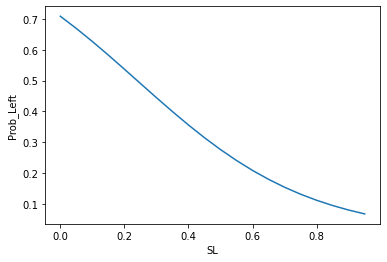

In [34]:
sn.lineplot(data=sl_probs_df, x="SL", y="Prob_Left");

### Participant Exercise: 2

- Build a logistic regression model between average_montly_hours and left
- Predict probability for different values of average_montly_hours
- Plot the logistic function

### Building a model with all the variables
#### Setting X & y variable

In [35]:
X_features = list(hr_encoded_df.columns)

In [36]:
X_features

['satisfaction_level',
 'last_evaluation',
 'number_project',
 'average_montly_hours',
 'time_spend_company',
 'Work_accident',
 'left',
 'promotion_last_5years',
 'salary',
 'dept_IT',
 'dept_RandD',
 'dept_accounting',
 'dept_hr',
 'dept_management',
 'dept_marketing',
 'dept_product_mng',
 'dept_sales',
 'dept_support',
 'dept_technical']

In [37]:
X_features.remove('left')

In [38]:
X = hr_encoded_df[X_features]
y = hr_encoded_df.left

In [39]:
X[0:2]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,dept_IT,dept_RandD,dept_accounting,dept_hr,dept_management,dept_marketing,dept_product_mng,dept_sales,dept_support,dept_technical
0,0.38,0.53,2,157,3,0,0,1,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,0,2,0,0,0,0,0,0,0,1,0,0


In [40]:
y[0:2]

0    1
1    1
Name: left, dtype: int64

### Split Dataset into train and test

- Train: 80%
- Test: 20%

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X_train, X_test, \
y_train, y_test = train_test_split( X,
                                    y,
                                    test_size = 0.2,
                                    random_state = 100 )

In [43]:
X_train.shape

(11999, 18)

In [44]:
X_test.shape

(3000, 18)

In [45]:
from sklearn.linear_model import LogisticRegression

In [46]:
logreg_v1 = LogisticRegression(random_state = 100, 
                               max_iter = 1000)

In [47]:
logreg_v1.fit( X_train, y_train )

LogisticRegression(max_iter=1000, random_state=100)

### Finding Parameters

In [48]:
logreg_v1.intercept_

array([0.75759457])

In [49]:
logreg_v1.coef_

array([[-3.96253069e+00,  7.10802299e-01, -2.96345834e-01,
         4.47341946e-03,  2.67032094e-01, -1.50131618e+00,
        -1.25195574e+00, -6.01824348e-01,  2.66689097e-03,
        -3.60723163e-01,  2.36294018e-01,  4.22093510e-01,
        -2.85528690e-01,  1.30752462e-01,  2.13872522e-02,
         1.24372556e-01,  2.01243088e-01,  2.26774174e-01]])

In [50]:
dict( zip( X_features, np.round(logreg_v1.coef_[0], 4) ) )

{'satisfaction_level': -3.9625,
 'last_evaluation': 0.7108,
 'number_project': -0.2963,
 'average_montly_hours': 0.0045,
 'time_spend_company': 0.267,
 'Work_accident': -1.5013,
 'promotion_last_5years': -1.252,
 'salary': -0.6018,
 'dept_IT': 0.0027,
 'dept_RandD': -0.3607,
 'dept_accounting': 0.2363,
 'dept_hr': 0.4221,
 'dept_management': -0.2855,
 'dept_marketing': 0.1308,
 'dept_product_mng': 0.0214,
 'dept_sales': 0.1244,
 'dept_support': 0.2012,
 'dept_technical': 0.2268}

### Predict on Test Set

- p(y) >= 0.5,  y = 1 (L)
- p(y) < 0.5, y = 0 (NL)

In [51]:
logreg_v1.predict_proba( X_test )

array([[0.91399866, 0.08600134],
       [0.90035058, 0.09964942],
       [0.51749254, 0.48250746],
       ...,
       [0.89980692, 0.10019308],
       [0.96379619, 0.03620381],
       [0.97575031, 0.02424969]])

In [52]:
pred_logreg_v1 = logreg_v1.predict( X_test )

In [53]:
y_logreg_v1 = pd.DataFrame( { "actual": y_test,
                              "predicted": pred_logreg_v1 } )

In [54]:
y_logreg_v1.sample(10, random_state = 20)

,actual,predicted
310,1,1
14670,1,0
1322,1,0
3314,0,0
11348,0,1
12630,1,1
7293,0,0
13600,0,0
4038,0,0
1499,1,0


### Evaluating the model

In [55]:
from sklearn.metrics import accuracy_score

In [56]:
accuracy_score(y_logreg_v1.actual, y_logreg_v1.predicted)

0.787

### Building Confusion Matrix

<img src="confusion_matrix.png" alt="ML Algorithms" width="600"/>

In [57]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [58]:
cm = confusion_matrix(y_logreg_v1.actual, y_logreg_v1.predicted, labels = [1,0])

In [59]:
cmlot = ConfusionMatrixDisplay(confusion_matrix=cm, 
                                 display_labels=['Left', 'Not Left'])

In [60]:
y_test.value_counts()

0    2250
1     750
Name: left, dtype: int64

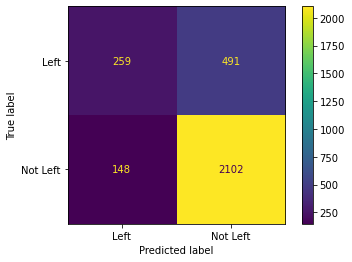

In [61]:
cm_plot.plot();

In [62]:
from sklearn.metrics import recall_score

In [63]:
print(recall_score(y_logreg_v1.actual, y_logreg_v1.predicted))

0.3453333333333333


In [64]:
from sklearn.metrics import precision_score

In [65]:
print(precision_score(y_logreg_v1.actual, y_logreg_v1.predicted))

0.6363636363636364


### KNN Model

In [66]:
import matplotlib.pyplot as plt
import seaborn as sn

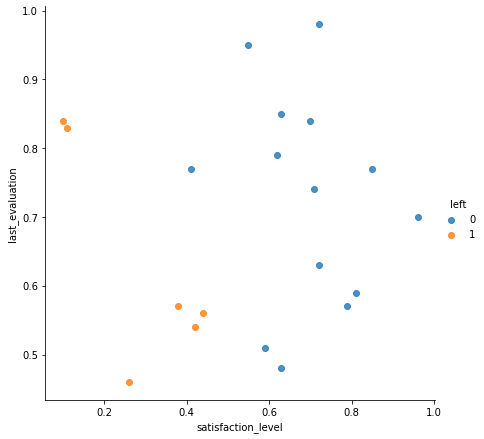

In [67]:
sn.lmplot( data = hr_df.sample(20, random_state = 30),
           x = 'satisfaction_level',
           y = 'last_evaluation',
           hue = 'left',
           fit_reg = False,
           height = 6);

### Participant Exercise: 3

- Build a KNN classifier
- Create a confusion matrix on test data
- Calculate the recall score

In [68]:
from sklearn.neighbors import KNeighborsClassifier

###  Participant Exercise: 2

- Grid Search
- Find the optimal hyperparameters
    - n_neighbors [5 to 20]
    - weights: ['uniform', 'distance']
- use 'recall' for scoring    
- Print the best params and best score    

### Building a Decision Tree Model

<img src="decisiontree.png" alt="decision tree"/>

In [69]:
from sklearn.tree import DecisionTreeClassifier

In [70]:
tree_v2 = DecisionTreeClassifier( max_depth = 5 )
### Max Depth is called hyperparameter

In [71]:
tree_v2.fit( X_train, y_train )

DecisionTreeClassifier(max_depth=5)

In [72]:
y_tree_pred = tree_v2.predict( X_test )

In [73]:
accuracy_score(y_test, y_tree_pred)

0.9753333333333334

In [74]:
recall_score(y_test, y_tree_pred)

0.9373333333333334

### Participant Exercise: 3

- Build the confusion matrix
- Calculate total accuracy, recall score

### Participant Exercise: 4

Grid Search for Decision Tree

- Search for max_depth from 5 to 15
- cv = 10
- scoring = 'recall'

In [75]:
from sklearn.model_selection import GridSearchCV

In [76]:
params = {"max_depth" : range(4, 25, 1)}

In [77]:
tree_grid = GridSearchCV(DecisionTreeClassifier(),
                         param_grid = params,
                         cv = 10,
                         scoring = 'recall')

In [78]:
tree_grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(4, 25)}, scoring='recall')

In [79]:
tree_grid.best_params_

{'max_depth': 23}

In [80]:
tree_grid.best_score_

0.9645578026714784

### Feature Importance

In [81]:
tree_v2.feature_importances_

array([5.20571849e-01, 1.50903588e-01, 1.02812305e-01, 6.61478332e-02,
       1.58379055e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.08853988e-03, 9.68306679e-05])

In [82]:
features_df = pd.DataFrame( { "features": X_features,
                              "importance": tree_v2.feature_importances_ } )

In [83]:
features_df = features_df.sort_values("importance", ascending = False)

In [84]:
features_df['cumsum'] = features_df.importance.cumsum()

In [85]:
features_df

,features,importance,cumsum
0,satisfaction_level,0.520572,0.520572
4,time_spend_company,0.158379,0.678951
1,last_evaluation,0.150904,0.829854
2,number_project,0.102812,0.932667
3,average_montly_hours,0.066148,0.998815
16,dept_support,0.001089,0.999903
17,dept_technical,0.000097,1.000000
7,salary,0.000000,1.000000
8,dept_IT,0.000000,1.000000
6,promotion_last_5years,0.000000,1.000000


### Participant Exercise:

- Build the model with only top 5 features
- Build the confusion matrix and recall score

### Visualizing Decision Tree

In [86]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

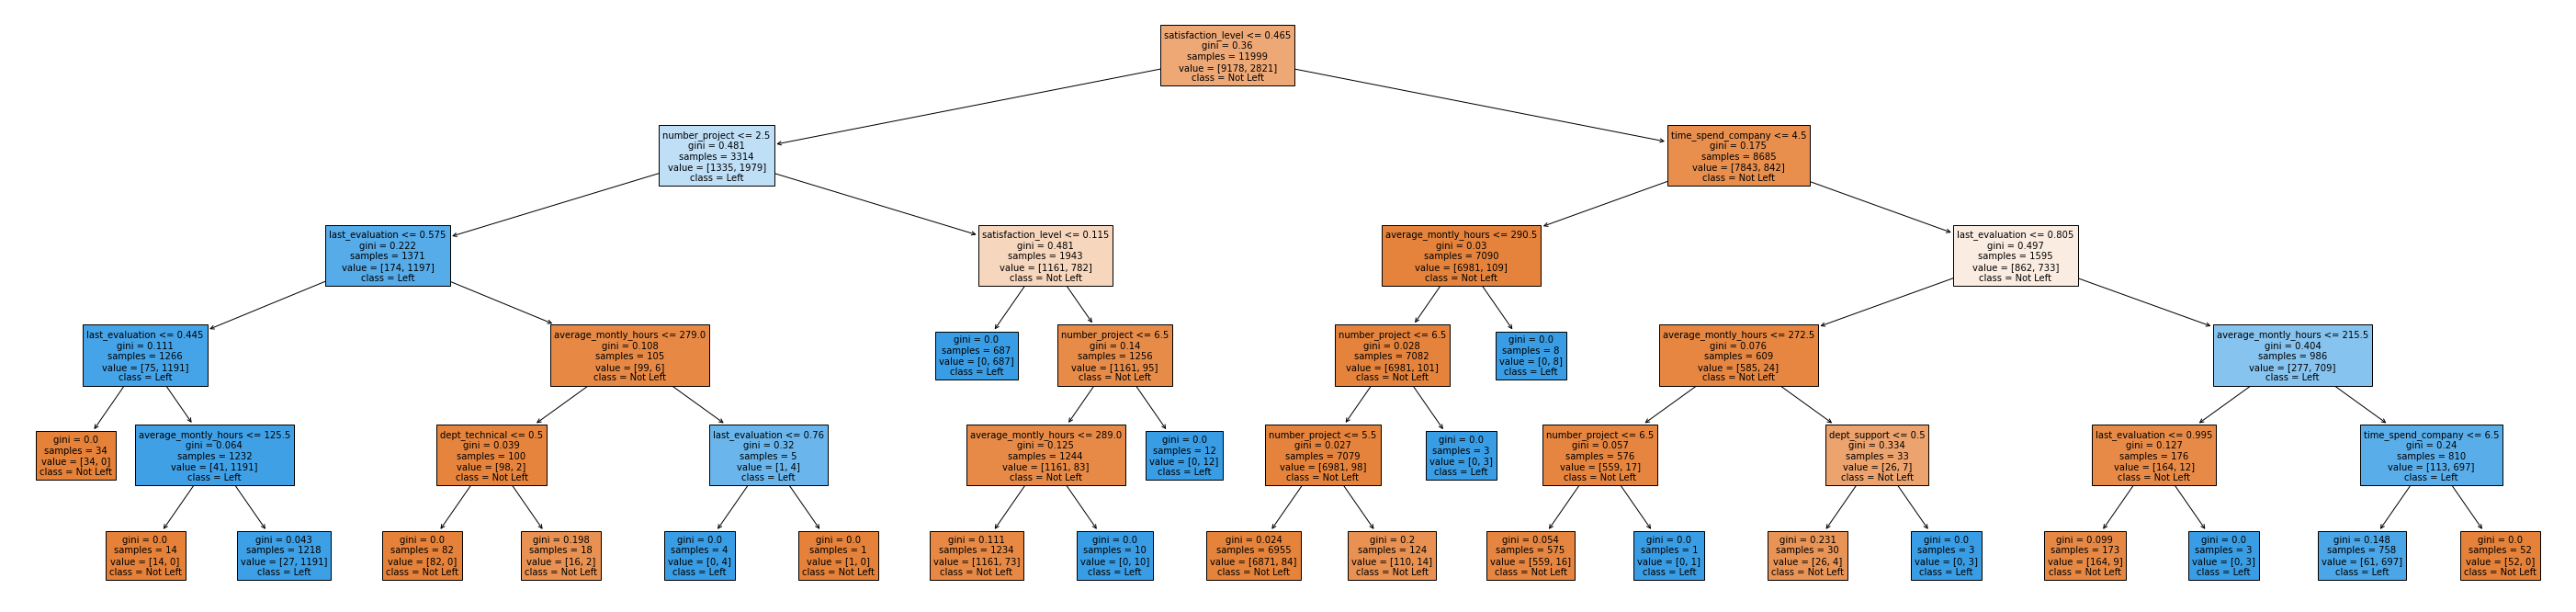

In [87]:
plt.figure(figsize = (50, 12))
plot_tree(tree_v2,
          feature_names = X_features,
          class_names = ['Not Left', 'Left'],
          filled = True,
          fontsize = 10);
plt.savefig('tree.png')